### Import all libraries

In [208]:
# NUMPY
import numpy as np

# PANDAS
import pandas as pd

# SKLEARN
import sklearn

# MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline

# SEABORN
import seaborn as sns

# Missing Values Imputer
from sklearn.impute import SimpleImputer

# Split into train and test data
from sklearn.model_selection import train_test_split

# Scaling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Ridge Regression
from sklearn.linear_model import Ridge

# Lasso Regression
from sklearn.linear_model import Lasso

# Grid Search
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import mean_squared_error, r2_score

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [209]:
# Read CSV dataset using pandas.
data = pd.read_csv('train.csv')

### View the dataset

In [210]:
# Get a general idea of the dataset by looking at a few rows.
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Analyse the metadata and data distributions and tendencies

In [211]:
# Get the list of columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [212]:
# Get the metadata
pd.DataFrame(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

""


In [213]:
# Get the data distributions
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Check the skewness of the data

In [214]:
# Check how much skewed each column is, the more the value away from 0, the more the skewness. 
# Skewed data isn't useful for the model.
pd.DataFrame(data.skew())

,0
Id,0.000000
MSSubClass,1.407657
LotFrontage,2.163569
LotArea,12.207688
OverallQual,0.216944
OverallCond,0.693067
YearBuilt,-0.613461
YearRemodAdd,-0.503562
MasVnrArea,2.669084
BsmtFinSF1,1.685503


### Remove columns with high skewness and abundance of missing values.

In [215]:
# Prepare the list of columns to be removed.
remove_columns = ['Street', 'Alley', 'Utilities', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 
                  'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 
                  'KitchenAbvGr', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'BldgType', 
                  'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'RoofStyle', 'ExterCond', '2ndFlrSF',
                  'LowQualFinSF', 'Functional', 'SaleType', 'Fence']

In [216]:
# These columns have a high skewness where majority of the values either belong to a certain category or 
# have a majority of  null values. We observe the distribution of these columns using their value counts.
# Such columns do not provide the model with any useful information.
for column in remove_columns:
    display(pd.DataFrame(data[column].value_counts()))

,Street
Pave,1454
Grvl,6


,Alley
Grvl,50
Pave,41


,Utilities
AllPub,1459
NoSeWa,1


,LandContour
Lvl,1311
Bnk,63
HLS,50
Low,36


,LandSlope
Gtl,1382
Mod,65
Sev,13


,Condition1
Norm,1260
Feedr,81
Artery,48
RRAn,26
PosN,19
RRAe,11
PosA,8
RRNn,5
RRNe,2


,Condition2
Norm,1445
Feedr,6
PosN,2
Artery,2
RRNn,2
RRAn,1
PosA,1
RRAe,1


,RoofMatl
CompShg,1434
Tar&Grv,11
WdShngl,6
WdShake,5
Metal,1
Roll,1
Membran,1
ClyTile,1


,BsmtCond
TA,1311
Gd,65
Fa,45
Po,2


,BsmtFinType2
Unf,1256
Rec,54
LwQ,46
BLQ,33
ALQ,19
GLQ,14


,BsmtFinSF2
0,1293
180,5
374,3
551,2
93,2
...,...
532,1
544,1
546,1
547,1


,Heating
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


,CentralAir
Y,1365
N,95


,Electrical
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


,BsmtHalfBath
0,1378
1,80
2,2


,KitchenAbvGr
1,1392
2,65
3,2
0,1


,GarageQual
TA,1311
Fa,48
Gd,14
Po,3
Ex,3


,GarageCond
TA,1326
Fa,35
Gd,9
Po,7
Ex,2


,PavedDrive
Y,1340
N,90
P,30


,EnclosedPorch
0,1252
112,15
96,6
120,5
144,5
...,...
174,1
177,1
183,1
189,1


,3SsnPorch
0,1436
168,3
216,2
144,2
180,2
245,1
238,1
290,1
196,1
182,1


,BldgType
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


,ScreenPorch
0,1344
192,6
224,5
120,5
189,4
...,...
182,1
440,1
178,1
312,1


,PoolArea
0,1453
738,1
648,1
576,1
555,1
519,1
512,1
480,1


,PoolQC
Gd,3
Fa,2
Ex,2


,MiscFeature
Shed,49
Othr,2
Gar2,2
TenC,1


,MiscVal
0,1408
400,11
500,8
700,5
450,4
2000,4
600,4
1200,2
480,2
1150,1


,RoofStyle
Gable,1141
Hip,286
Flat,13
Gambrel,11
Mansard,7
Shed,2


,ExterCond
TA,1282
Gd,146
Fa,28
Ex,3
Po,1


,2ndFlrSF
0,829
728,10
504,9
672,8
546,8
...,...
788,1
1116,1
1112,1
1111,1


,LowQualFinSF
0,1434
80,3
360,2
528,1
53,1
120,1
144,1
156,1
205,1
232,1


,Functional
Typ,1360
Min2,34
Min1,31
Mod,15
Maj1,14
Maj2,5
Sev,1


,SaleType
WD,1267
New,122
COD,43
ConLD,9
ConLw,5
ConLI,5
CWD,4
Oth,3
Con,2


,Fence
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


In [217]:
# Drop the columns
data.drop(remove_columns, axis=1, inplace=True)

In [218]:
# Check the metadata now
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     1423 non-null object
BsmtFinSF1       1460 non-null int64
BsmtUnfSF        1460 non

### Impute missing values in the dataset.

In [219]:
# Function to impute the missing values

# function name: impute_values
# @Param(data) - The dataframe on which the operation is performed.
# @Param(column) - The column which is imputed.
# @Param(imputer) - The stategry used to impute.
def impute_values(data, column, imputer):
    imputer.fit(data[[column]])
    data[[column]] = imputer.transform(data[[column]])
    return data

#### Impute using median for numeric data.

In [220]:
# Impute using median values.
imputer = SimpleImputer(strategy='median')

In [221]:
data = impute_values(data, 'LotFrontage', imputer)
data = impute_values(data, 'MasVnrArea', imputer)

#### For columns with lesser missing categorical data impute using the most frequent occurence.

In [222]:
# Impute using most frequent values.
imputer = SimpleImputer(strategy='most_frequent')

In [223]:
data = impute_values(data, 'MasVnrType', imputer)

#### For columns with more number of missing values or with related columns impute using a constant.

In [224]:
# Impute using constant values.
imputer = SimpleImputer(strategy='constant', fill_value='None')

In [225]:
data = impute_values(data, 'BsmtQual', imputer)
data = impute_values(data, 'BsmtExposure', imputer)
data = impute_values(data, 'BsmtFinType1', imputer)

data = impute_values(data, 'GarageType', imputer)
data = impute_values(data, 'GarageFinish', imputer)

data = impute_values(data, 'FireplaceQu', imputer)

In [226]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
data = impute_values(data, 'GarageYrBlt', imputer)

### Change quality columns to numeric.

In [227]:
# Convert ordinal columns to numeric
def changeToNumeric(data, column):
    data[column] = data[column].str.replace('Ex', '5')
    data[column] = data[column].str.replace('Gd', '4')
    data[column] = data[column].str.replace('TA', '3')
    data[column] = data[column].str.replace('Fa', '2')
    data[column] = data[column].str.replace('Po', '1')
    data[column] = data[column].str.replace('None', '0')
    return data

In [228]:
data['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [229]:
data['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [230]:
data['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [231]:
data = changeToNumeric(data, 'BsmtQual')
data = changeToNumeric(data, 'KitchenQual')
data = changeToNumeric(data, 'FireplaceQu')

In [232]:
# Convert the columns to integer.
data['BsmtQual'] = pd.to_numeric(data['BsmtQual'])
data['KitchenQual'] = pd.to_numeric(data['KitchenQual'])
data['FireplaceQu'] = pd.to_numeric(data['FireplaceQu'])

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LotConfig        1460 non-null object
Neighborhood     1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-null int64
BsmtExposure     1460 non-null object
BsmtFinType1     1460 non-null object
BsmtFinSF1       1460 non-null int64
BsmtUnfSF        1460 non-

### Aggregate categories with few values into a single category.

In [234]:
# Function to perform the aggregation.
# For example: For column (MSZoning)
# RL         1151
# RM          218
# FV           65
# RH           16
# C (all)      10

# aggregation can be done as
# RL         1151
# Others      309

# function name: aggregate
# @Param(data) - The dataframe on which the operation is performed.
# @Param(column) - The column which is aggregated.
# @Param(cutoff) - The value below which all categories are clubbed into a single category.
# @Param(category) - The new aggregated category.
def aggregate(data, column, cutoff, category='Others'):
    
    # Get the value_counts of the categorical column. 
    value_counts = data[column].value_counts()
    
    # Get the categorical values with occurence frequency below the cutoff. 
    to_be_aggregated = value_counts[value_counts < cutoff].index.tolist()
    
    # Rename the category to 'category'. This will automatically aggregate all such values.
    data[column] = data[column].apply(lambda x: category if x in to_be_aggregated else x)
    
    # Return the modified dataframe.
    return data

In [235]:
# List of columns to be aggregated
aggregate_columns = [('MSSubClass', 100),
                     ('MSZoning', 100),
                     ('LotShape', 100),
                     ('LotConfig', 100),
                     ('HouseStyle', 100),
                     ('Exterior1st', 100),
                     ('Exterior2nd', 100),
                     ('MasVnrType', 100),
                     ('Foundation', 100),
                     ('BsmtExposure', 100),
                     ('HeatingQC', 50),
                     ('BsmtFullBath', 100),
                     ('FullBath', 100),
                     ('HalfBath', 100),
                     ('BedroomAbvGr', 100),
                     ('TotRmsAbvGrd', 100),
                     #('Fireplaces', 100),
                     ('GarageType', 100),
                     ('GarageCars', 100)
                    ]

In [236]:
for column in aggregate_columns:
    data = aggregate(data, column[0], column[1])

### Check the distribution of target variable.

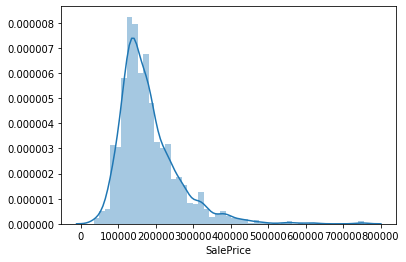

In [237]:
sns.distplot(data['SalePrice'])

### Transform the target variable using log transformation.

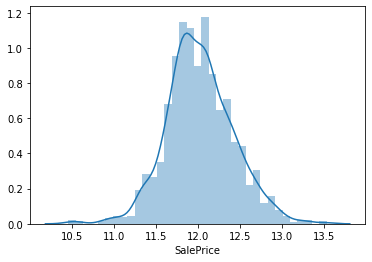

In [238]:
# Log Transformation
data['SalePrice'] = np.log(data['SalePrice'])
sns.distplot(data['SalePrice'])

### Create dummies from the categorical columns.

In [239]:
# Get the dummies
data = pd.get_dummies(data, drop_first=True)

In [240]:
# Check the number of columns after creating the dummies.
len(data.columns)

118

### Transform the year columns to the number of years in the past.

In [241]:
# List of the year columns.
year_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [242]:
# For every tear change to maximum year - current year.
for column in year_columns:
    max_val = data[column].max()
    data[column] = max_val - data[column]    

### Seperate the dependent and independent variables.

In [243]:
# Independent variable(s)
X = data.drop(['Id','SalePrice'], axis=1)

# Dependent variable.
y = data['SalePrice']

### Seperate the data into train and test data.

In [244]:
# Train - Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Scale the numeric data using min-max scaler.

In [245]:
# Columns to be scaled.
numeric_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                   'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YearBuilt', 'YearRemodAdd',
                   'GarageYrBlt', 'YrSold', 'OverallQual', 'OverallCond', 'BsmtQual', 'KitchenQual', 'FireplaceQu']

In [246]:
# Scale the columns.
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

### Ridge Regression.

In [247]:
# Declare the range of hyper-parameter values.
params = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100, 500]}

In [248]:
# Initialize Ridge Regression.
ridge = Ridge()

#### Grid Search for Hyperparameter Tuning.

In [249]:
# 5-fold cross-validation
folds = 5
model_ridge = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

In [250]:
# Fit the dataset
model_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10, 50, 100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

#### Check the best possible value of alpha and the Negative Mean Squared Error.

In [251]:
# Optimal value of alpha
model_ridge.best_params_

{'alpha': 7}

In [252]:
# Negative mean squared error
model_ridge.best_score_

-0.09835510625621069

#### Find the results of the gridsearch for various hyperparameters.

In [253]:
# Grid Search results.
ridge_results = pd.DataFrame(model_ridge.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha'] <= 50]
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007185,0.001500,0.001663,0.001522,0.01,{'alpha': 0.01},-0.101612,-0.106595,-0.103424,-0.106316,...,-0.101786,0.005710,16,-0.086797,-0.072938,-0.085600,-0.086145,-0.090202,-0.084336,0.005920
1,0.007355,0.007081,0.003455,0.006410,0.05,{'alpha': 0.05},-0.101427,-0.106300,-0.103272,-0.106236,...,-0.101499,0.005916,15,-0.086772,-0.073029,-0.085627,-0.086217,-0.090151,-0.084359,0.005879
2,0.004269,0.002584,0.002420,0.001623,0.1,{'alpha': 0.1},-0.101251,-0.106160,-0.103127,-0.106103,...,-0.101303,0.006009,14,-0.086758,-0.073089,-0.085640,-0.086259,-0.090120,-0.084373,0.005852
3,0.005285,0.001091,0.002111,0.001449,0.5,{'alpha': 0.5},-0.100261,-0.105614,-0.102056,-0.105304,...,-0.100421,0.006115,13,-0.086653,-0.073338,-0.085709,-0.086412,-0.089928,-0.084408,0.005723
4,0.006787,0.002348,0.002590,0.001964,1,{'alpha': 1},-0.099475,-0.105232,-0.101095,-0.104468,...,-0.099769,0.005984,11,-0.086592,-0.073552,-0.085816,-0.086540,-0.089778,-0.084456,0.005621


#### Plot the negative mean absolute error.

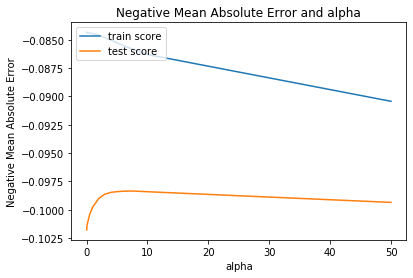

In [254]:
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [255]:
alpha = 7 # use the optimal value of alpha obtained from above.
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=7, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

#### Find the ridge regression coefficients.

In [256]:
# Ridge regression coefficients.
ridge.coef_

array([-0.01334076,  0.0187499 ,  0.08864286,  0.04285261, -0.02443853,
       -0.01612326, -0.00749635,  0.03801808, -0.01378344, -0.00076945,
       -0.0021193 , -0.00768379,  0.11394678,  0.01724092,  0.02833523,
        0.0155588 , -0.03026203,  0.01075756,  0.00512847, -0.00497293,
        0.00635952,  0.00263558, -0.04193523, -0.03466496, -0.08294837,
        0.01394407, -0.03954492,  0.00647125, -0.0018798 , -0.01905982,
       -0.00583472, -0.0181643 , -0.04382786,  0.03752795,  0.06060945,
       -0.01211167,  0.10558549, -0.06606328, -0.02692984, -0.0397267 ,
       -0.10725696,  0.0052619 , -0.02691011, -0.01558302, -0.02847077,
        0.07433366,  0.08465682, -0.01784153, -0.03289598, -0.01728693,
       -0.01607918,  0.04341208,  0.11274746,  0.01051528,  0.02284722,
        0.04174594, -0.03054667,  0.04139318,  0.02516104,  0.04167642,
        0.01760518, -0.00237135, -0.02348834, -0.01145696, -0.02322399,
       -0.00323807,  0.00337311,  0.03430755, -0.00106386, -0.03

### Lasso Regression.

In [257]:
# Declare the range of hyper-parameter values.
params = {'alpha': [0.00000001, 0.00000005, 0.000001, 0.000005, 0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005]}

In [258]:
# Initialize lasso regression.
lasso = Lasso()

#### Grid Search for Hyperparameter Tuning.

In [259]:
# 5-fold cross validation.
folds = 5
model_lasso = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

In [260]:
# Fit the dataset.
model_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-08, 5e-08, 1e-06, 5e-06, 1e-06, 5e-06,
                                   1e-05, 5e-05, 0.0001, 0.0005, 0.001,
                                   0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

#### Check the best possible value of alpha and the Negative Mean Squared Error.

In [261]:
# Optimal value of alpha
model_lasso.best_params_

{'alpha': 0.0005}

In [262]:
# Negative mean squared error
model_lasso.best_score_

-0.09868697671613184

#### Find the results of the gridsearch for various hyperparameters.

In [263]:
# Results of grid search.
lasso_results = pd.DataFrame(model_lasso.cv_results_)
lasso_results = lasso_results[lasso_results['param_alpha'] <= 0.05]
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.122482,0.006582,0.004227,0.005881,1e-08,{'alpha': 1e-08},-0.101733,-0.106427,-0.103389,-0.106423,...,-0.101449,0.006350,8,-0.086817,-0.072964,-0.085623,-0.086190,-0.090184,-0.084356,0.005912
1,0.123196,0.008334,0.002030,0.001788,5e-08,{'alpha': 5e-08},-0.101732,-0.106426,-0.103387,-0.106422,...,-0.101449,0.006348,9,-0.086816,-0.072964,-0.085623,-0.086190,-0.090183,-0.084355,0.005912
2,0.129636,0.014266,0.000598,0.001197,1e-06,{'alpha': 1e-06},-0.101705,-0.106417,-0.103350,-0.106396,...,-0.101451,0.006298,10,-0.086806,-0.072968,-0.085621,-0.086190,-0.090177,-0.084352,0.005908
3,0.141047,0.010946,0.000399,0.000798,5e-06,{'alpha': 5e-06},-0.101589,-0.106366,-0.103219,-0.106288,...,-0.101363,0.006277,6,-0.086765,-0.072987,-0.085611,-0.086191,-0.090150,-0.084341,0.005892
4,0.136994,0.014715,0.000000,0.000000,1e-06,{'alpha': 1e-06},-0.101705,-0.106417,-0.103350,-0.106396,...,-0.101451,0.006298,10,-0.086806,-0.072968,-0.085621,-0.086190,-0.090177,-0.084352,0.005908


#### Plot the negative mean absolute error.

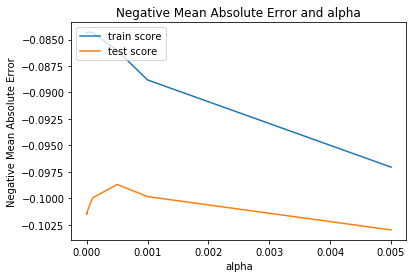

In [264]:
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [265]:
alpha = 0.0005 # use optimal value of alpha obtained from above.
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Find the lasso regression coefficients.

In [266]:
# lasso regression coefficients.
lasso.coef_

array([-0.01260757,  0.01970547,  0.08803333,  0.04459262, -0.03200092,
       -0.01711198, -0.00785914,  0.03862849, -0.00961308,  0.        ,
       -0.00099419, -0.        ,  0.10555163,  0.01575165,  0.02885801,
        0.01550444, -0.0254457 ,  0.00966094,  0.00608183, -0.00378417,
        0.00557374,  0.0019622 , -0.03487599, -0.02807956, -0.07945079,
        0.00799473, -0.04421362,  0.        , -0.        , -0.0158573 ,
        0.        , -0.        , -0.01284311,  0.04123163,  0.0713268 ,
        0.        ,  0.12829345, -0.04868254, -0.00557716, -0.01486012,
       -0.11380159,  0.00466605, -0.00386283, -0.        , -0.00270097,
        0.08280386,  0.09657201, -0.        , -0.        , -0.        ,
       -0.        ,  0.0482166 ,  0.13593677,  0.00875695,  0.        ,
        0.03050914, -0.02666732,  0.03686855,  0.00834014,  0.03011275,
        0.0048891 , -0.        , -0.01192898,  0.        , -0.01298878,
        0.        ,  0.        ,  0.01762769,  0.        , -0.01

### Scale the test variable.

In [267]:
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

### Calculate the train and test score for Ridge and Lasso regression.

#### RIDGE

In [268]:
# Train Score
ridge.score(X_train,y_train)

0.8969571349866852

In [269]:
# Test Score
ridge.score(X_test,y_test)

0.8888421253438608

#### LASSO

In [270]:
# Train Score
lasso.score(X_train,y_train)

0.8949406918134454

In [271]:
# Test Score
lasso.score(X_test,y_test)

0.8894201180633887

### Make Predictions on the test data for Ridge and Lasso regression.

In [272]:
# Predict using both ridge and lasso.
pred_ridge = model_ridge.predict(X_test)
pred_lasso = model_lasso.predict(X_test)

#### RIDGE

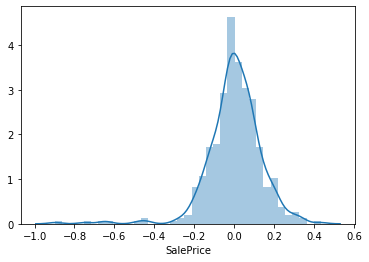

In [273]:
sns.distplot(y_test - pred_ridge)

#### LASSO

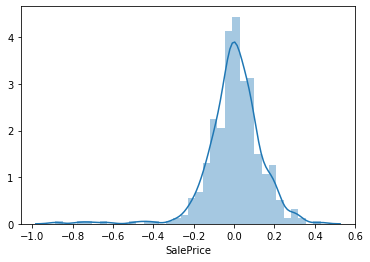

In [274]:
sns.distplot(y_test - pred_lasso)

#### The above plots are the error distribution. We observe that in both ridge and lasso the error distribution is normal.

### Find the most influential variables in Ridge and Lasso regression.

#### RIDGE

In [275]:
# Link the lasso regression coefficients to the columns
ridge_df = pd.DataFrame(sorted(list(zip(ridge.coef_, X_train.columns))), columns=['Coefficient', 'Column'])

In [276]:
# TOP 10 negatively performing variables.
ridge_df.head(10)

,Coefficient,Column
0,-0.107257,Neighborhood_MeadowV
1,-0.082948,MSSubClass_Others
2,-0.066063,Neighborhood_Edwards
3,-0.059518,BsmtFinType1_Unf
4,-0.047123,HeatingQC_Others
5,-0.043828,Neighborhood_BrDale
6,-0.041935,MSSubClass_50
7,-0.039727,Neighborhood_IDOTRR
8,-0.039545,MSZoning_RM
9,-0.034665,MSSubClass_60


In [277]:
# TOP 10 positively performing variables.
ridge_df.tail(10)

,Coefficient,Column
106,0.063008,BedroomAbvGr_4
107,0.074334,Neighborhood_NoRidge
108,0.075441,FullBath_Others
109,0.084262,SaleCondition_Alloca
110,0.084657,Neighborhood_NridgHt
111,0.088643,OverallQual
112,0.098205,GarageCars_3
113,0.105585,Neighborhood_Crawfor
114,0.112747,Neighborhood_StoneBr
115,0.113947,GrLivArea


#### LASSO

In [278]:
# Link the lasso regression coefficients to the columns
lasso_df = pd.DataFrame(sorted(list(zip(lasso.coef_, X_train.columns))), columns=['Coefficient', 'Column'])

In [279]:
# TOP 10 negatively performing variables.
lasso_df.head(10)

,Coefficient,Column
0,-0.113802,Neighborhood_MeadowV
1,-0.079451,MSSubClass_Others
2,-0.052493,BsmtFinType1_Unf
3,-0.048683,Neighborhood_Edwards
4,-0.044214,MSZoning_RM
5,-0.038354,HeatingQC_Others
6,-0.034876,MSSubClass_50
7,-0.032001,YearBuilt
8,-0.029931,GarageType_Others
9,-0.028080,MSSubClass_60


In [280]:
# TOP 10 positively performing variables.
lasso_df.tail(10)

,Coefficient,Column
106,0.071327,Neighborhood_ClearCr
107,0.072469,FullBath_Others
108,0.082804,Neighborhood_NoRidge
109,0.088033,OverallQual
110,0.096572,Neighborhood_NridgHt
111,0.104640,SaleCondition_Alloca
112,0.105552,GrLivArea
113,0.106814,GarageCars_3
114,0.128293,Neighborhood_Crawfor
115,0.135937,Neighborhood_StoneBr


### Calculate mean squared error and r2 score.

#### RIDGE

In [281]:
# R2 score of TRAIN data
r2_score(y_train, model_ridge.predict(X_train))

0.8969571349866851

In [282]:
# R2 score of TEST data
r2_score(y_test, model_ridge.predict(X_test))

0.8888421253438608

In [283]:
# RMSE of TRAIN data
np.sqrt(mean_squared_error(y_train, model_ridge.predict(X_train)))

0.12644257370843454

In [284]:
# RMSE of TEST data
np.sqrt(mean_squared_error(y_test, model_ridge.predict(X_test)))

0.13732263886292068

#### LASSO

In [285]:
# R2 score of TRAIN data
r2_score(y_train, model_lasso.predict(X_train))

0.8949406918134454

In [286]:
# R2 score of TEST data
r2_score(y_test, model_lasso.predict(X_test))

0.8894201180633887

In [287]:
# RMSE of TRAIN data
np.sqrt(mean_squared_error(y_train, model_lasso.predict(X_train)))

0.12767375538532233

In [288]:
# RMSE of TEST data
np.sqrt(mean_squared_error(y_test, model_lasso.predict(X_test)))

0.13696515212277133

### RESULTS: Finding the relation between the most influential variables and the sale prices.

In [289]:
data['SalePrice'] = np.exp(data['SalePrice'])

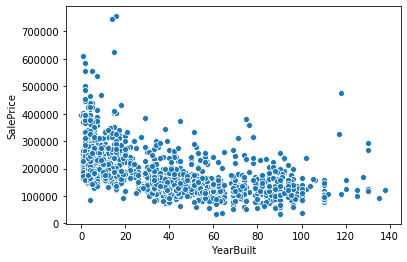

In [290]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data)

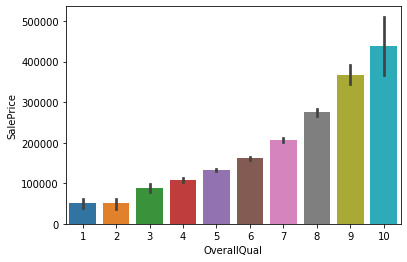

In [291]:
sns.barplot(x='OverallQual', y='SalePrice', data=data)

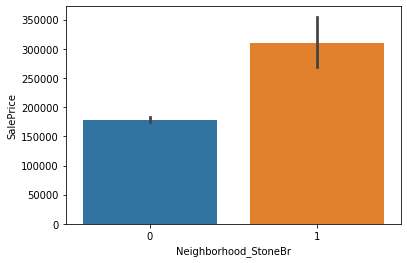

In [292]:
sns.barplot(x='Neighborhood_StoneBr', y='SalePrice', data=data)

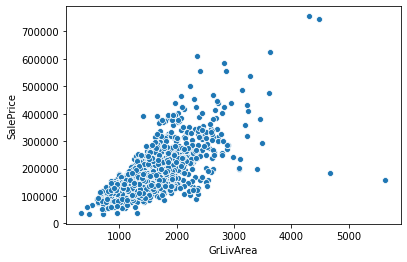

In [293]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)

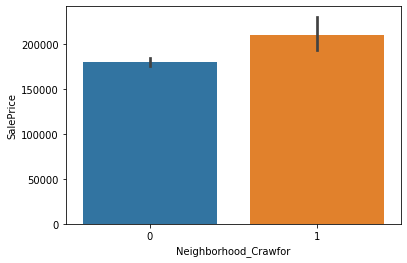

In [294]:
sns.barplot(x='Neighborhood_Crawfor', y='SalePrice', data=data)

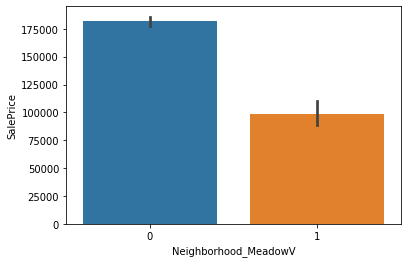

In [295]:
sns.barplot(x='Neighborhood_MeadowV', y='SalePrice', data=data)

<span><font color="blue">By using Ridge and Lasso regression, we found out the most significant variables (columns) in the dataset which govern the price of the house. Taking the results of both ridge and lasso regression, the following variables have an impact on the saleprice
<ul>
    <li><font color="black"><b>Neighborhood:</b></font> This variable is one of the most impactful. Which some values positively affect the price, the others affect it negatively. <br>In other words, if the neigborhood is <font color="red"><b>Stone Brook, Clear Creek, Northridge Heights</b></font>, the price is expected to go up. <br> However, if the neighborhood is <font color="red"><b>Meadow Village or Edward</b></font>, the expected price is supposed to go down.</li>
    <li><font color="black"><b>GrLivArea:</b></font> As expected, higher the living area, more the price. </li>
    <li><font color="black"><b>Overall Quality:</b></font>The better the material use in the house, the better the price it attracts.</li>
    <li><font color="black"><b>Garage capacity:</b></font>A house with 3 or more garage car space attracts a better pricing.</li>
    <li><font color="black"><b>YearBuilt:</b></font>The more the age of the house, the lesser the price it attracts.</li>
    <li><font color="black"><b>SaleCondition:</b></font>If the property is of type 'Allocation' (Two linked properties with separate deeds, typically condo with a garage unit, it may fetch a higher price</li>
</ul>
</font>
    
<font color="green">Summary:<br>Neighborhood seems to be the primary concern of potential buyers when buying a house. A house with good relevant neighborhood would fetch best rates. Factors like house area, individual floor, living areas will get more price with increase in magnitude however thats an obvious trend. Newley constructed homes are more preferred. Garage area is an important factor as people would need parking space.</font>
</span>

# Question 1 (Subjective)

In [296]:
alpha = 14 # use the optimal value of alpha obtained from above.
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=14, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [297]:
ridge.score(X_train,y_train)

0.8932706578219456

In [298]:
ridge.score(X_test,y_test)

0.8906371414646271

In [299]:
# Link the lasso regression coefficients to the columns
ridge_df = pd.DataFrame(sorted(list(zip(ridge.coef_, X_train.columns))), columns=['Coefficient', 'Column'])

In [300]:
ridge_df.head()

,Coefficient,Column
0,-0.070433,MSSubClass_Others
1,-0.069816,Neighborhood_MeadowV
2,-0.059610,Neighborhood_Edwards
3,-0.051371,BsmtFinType1_Unf
4,-0.043332,MSZoning_RM


In [301]:
ridge_df.tail()

,Coefficient,Column
111,0.078724,Neighborhood_StoneBr
112,0.081967,GarageCars_3
113,0.086435,Neighborhood_Crawfor
114,0.090336,OverallQual
115,0.107506,GrLivArea


In [302]:
alpha = 0.001 # use the optimal value of alpha obtained from above.
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [303]:
lasso.score(X_train,y_train)

0.8859664651802596

In [304]:
lasso.score(X_test,y_test)

0.891638019880997

In [305]:
# Link the lasso regression coefficients to the columns
lasso_df = pd.DataFrame(sorted(list(zip(lasso.coef_, X_train.columns))), columns=['Coefficient', 'Column'])

In [306]:
lasso_df.head()

,Coefficient,Column
0,-0.066749,MSZoning_RM
1,-0.053211,MSSubClass_Others
2,-0.044165,BsmtFinType1_Unf
3,-0.040868,Neighborhood_Edwards
4,-0.039774,YearBuilt


In [307]:
lasso_df.tail()

,Coefficient,Column
111,0.079690,Neighborhood_StoneBr
112,0.092418,GarageCars_3
113,0.094265,OverallQual
114,0.101199,Neighborhood_Crawfor
115,0.108277,GrLivArea


# Question 3 (Subjective)

In [308]:
X_train = X_train.drop(['Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'GarageCars_3', 'GrLivArea'], axis=1)

In [309]:
lasso = Lasso()

In [310]:
folds = 5
model_lasso = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

In [311]:
model_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-08, 5e-08, 1e-06, 5e-06, 1e-06, 5e-06,
                                   1e-05, 5e-05, 0.0001, 0.0005, 0.001,
                                   0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [312]:
model_lasso.best_params_

{'alpha': 0.001}

In [313]:
model_lasso.best_score_

-0.10741358842735146

In [314]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [315]:
lasso.coef_

array([-0.00933984,  0.02088767,  0.114186  ,  0.04462021, -0.00569434,
       -0.02307589, -0.00166708,  0.04036033, -0.00386803, -0.        ,
       -0.00370685,  0.06598327,  0.017255  ,  0.03430414,  0.02203324,
       -0.02316612,  0.04078576,  0.00671028, -0.00136126,  0.005884  ,
        0.0037758 , -0.        ,  0.        , -0.05951958,  0.        ,
       -0.08199075, -0.        , -0.00413733, -0.00902917,  0.        ,
       -0.        , -0.        ,  0.00134964,  0.03960482, -0.00421339,
       -0.05872313, -0.01267195, -0.01680567,  0.        , -0.0190992 ,
       -0.        , -0.02544975,  0.06087165,  0.03282511, -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.01528561,  0.01207121,  0.        ,  0.00393468,
        0.00748735,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.00

In [316]:
lasso_df = pd.DataFrame(sorted(list(zip(lasso.coef_, X_train.columns))), columns=['Coefficient', 'Column'])

In [317]:
lasso_df.head()

,Coefficient,Column
0,-0.081991,MSZoning_RM
1,-0.059520,MSSubClass_Others
2,-0.058723,Neighborhood_Edwards
3,-0.047900,BsmtFinType1_Unf
4,-0.025450,Neighborhood_NWAmes


In [318]:
lasso_df.tail()

,Coefficient,Column
106,0.060921,HalfBath_1
107,0.065983,1stFlrSF
108,0.093876,BedroomAbvGr_4
109,0.114186,OverallQual
110,0.140938,FullBath_Others
